In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf
import pandas_profiling as pp
import sweetviz as sv

# Problem 1

Delivery_time -> Predict delivery time using sorting time.

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using Python.

In [2]:
# loading the data
data = pd.read_csv(r'C:\Users\lenovo\Desktop\ExcelR\Assingments\4. Simple Linear Regression\delivery_time.csv')
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
data.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [4]:
data[data.duplicated()].shape

(0, 2)

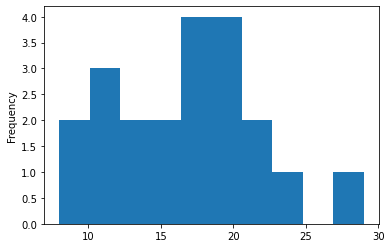

In [5]:
data['Delivery Time'].plot.hist()

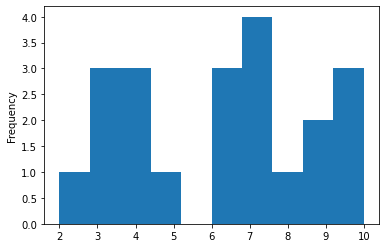

In [6]:
data['Sorting Time'].plot.hist()

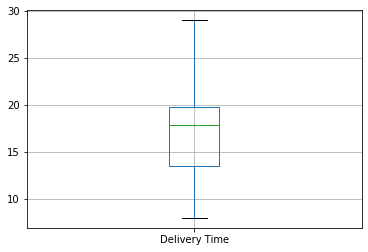

In [7]:
data.boxplot(['Delivery Time'])

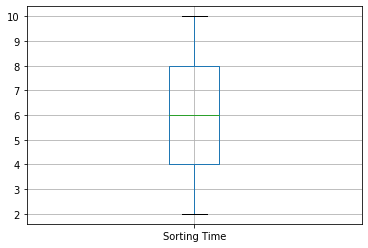

In [8]:
data.boxplot(['Sorting Time'])

In [9]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


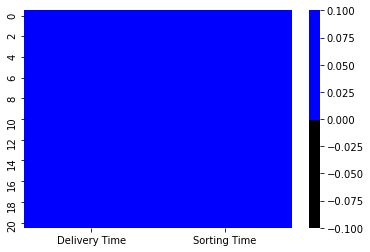

In [10]:
cols = data.columns 
colours = ['black', 'blue'] # specify the colours - black is missing. blue is not missing.
sns.heatmap(data[cols].isnull(),
            cmap=sns.color_palette(colours))

In [11]:
data[data.isnull().any(axis=1)]

,Delivery Time,Sorting Time


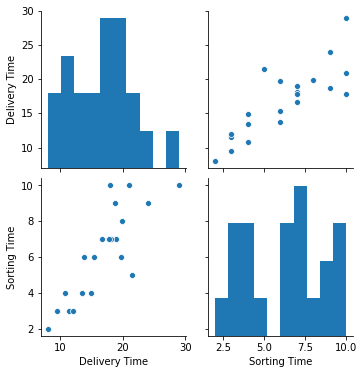

In [12]:
sns.pairplot(data)

In [13]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [17]:
EDA_report = pp.ProfileReport(data)
EDA_report.to_file(output_file='report.html')

In [19]:
sweet_report = sv.analyze(data)
sweet_report.show_html('Delivery_report.html')


Report Delivery_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [20]:
data = data.rename({'Sorting Time' : 'Sorting_Time','Delivery Time':'Delivery_Time'},axis=1)
data

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [21]:
# Regression model
model = smf.ols("Delivery_Time~Sorting_Time", data = data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sun, 06 Dec 2020   Prob (F-statistic):           3.98e-06
Time:                        09:16:35   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

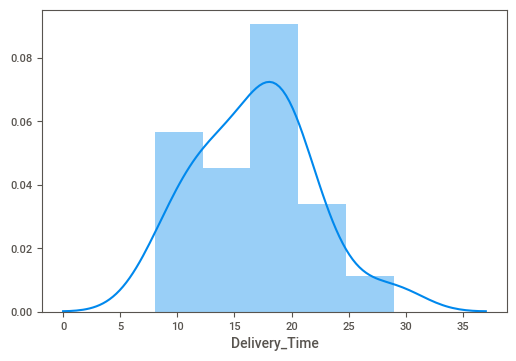

In [22]:
sns.distplot(data['Delivery_Time'])

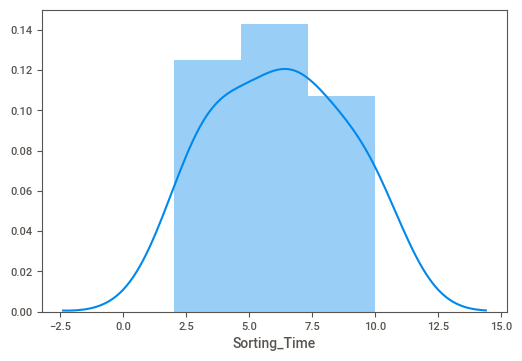

In [23]:
sns.distplot(data.Sorting_Time)

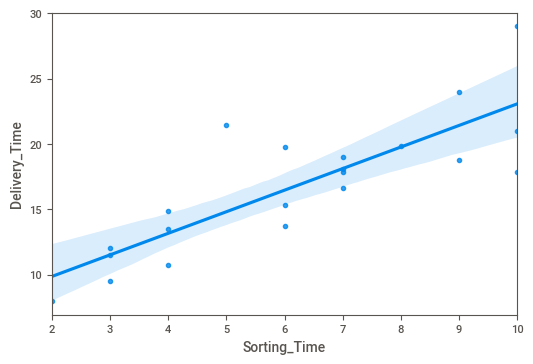

In [24]:
sns.regplot(x="Sorting_Time", y="Delivery_Time",data=data)

In [25]:
# Now let us check the model
new_delivery = pd.Series([2,6,5])
new_delivery = pd.DataFrame(data = new_delivery,columns=['Sorting_Time'])
new_delivery

,Sorting_Time
0,2
1,6
2,5


In [26]:
model.predict(new_delivery)

0     9.880774
1    16.476853
2    14.827833
dtype: float64

# Problem 2

Salary_hike -> Build a prediction model for Salary_hike.

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using Python.

In [27]:
data = pd.read_csv(r'C:\Users\lenovo\Desktop\ExcelR\Assingments\4. Simple Linear Regression\Salary_Data.csv')
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [28]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [29]:
data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [30]:
data[data.duplicated()].shape

(0, 2)

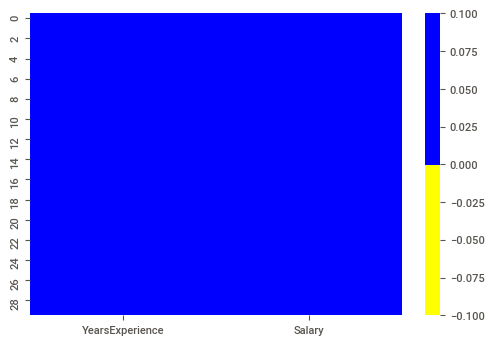

In [36]:
sns.heatmap(data[data.columns].isnull(), cmap = sns.color_palette(['yellow','blue']))

In [37]:
data[data.isnull().any(axis=1)]

,YearsExperience,Salary


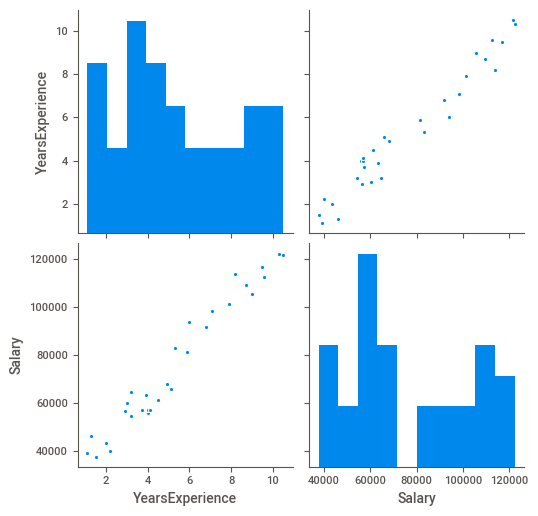

In [45]:
sns.pairplot(data)

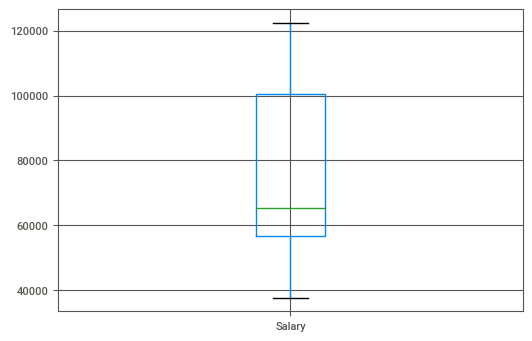

In [43]:
data.boxplot('Salary')

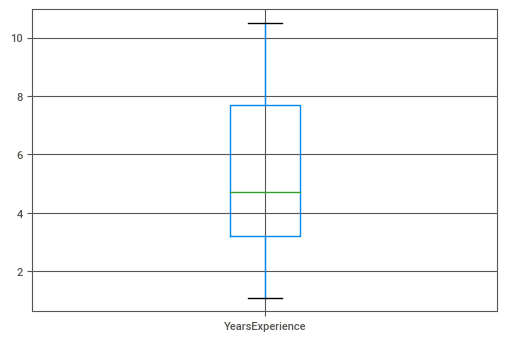

In [44]:
data.boxplot('YearsExperience')

In [46]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [50]:
EDA_report = pp.ProfileReport(data)
EDA_report.to_file('salary_report.html')

In [52]:
sweet_report = sv.analyze(data)
sweet_report.show_html('Salary.html')


Report Salary.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [53]:
model = smf.ols("Salary~YearsExperience",data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 06 Dec 2020   Prob (F-statistic):           1.14e-20
Time:                        10:26:52   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

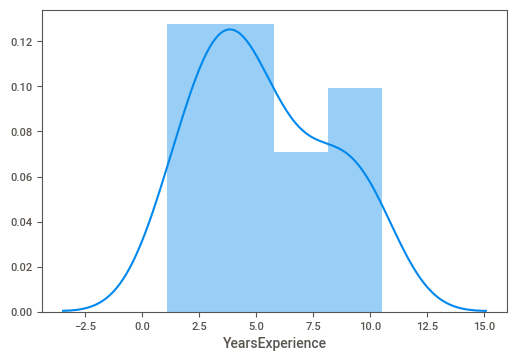

In [55]:
sns.distplot(data.YearsExperience)

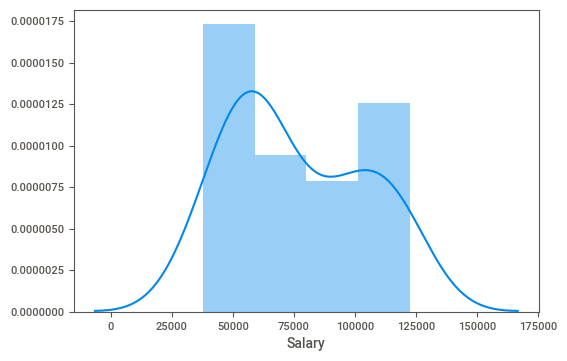

In [56]:
sns.distplot(data.Salary)

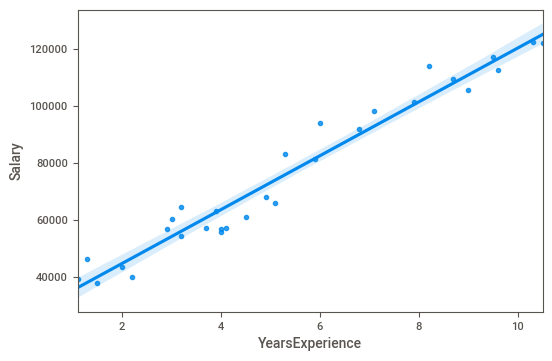

In [49]:
sns.regplot(x='YearsExperience',y='Salary',data=data)

In [64]:
new_exp = pd.Series([3,5.5,2.4,6.7])
new_exp = pd.DataFrame(new_exp,columns=['YearsExperience'])

In [65]:
model.predict(new_exp)

0    54142.087163
1    77766.992967
2    48472.109770
3    89106.947752
dtype: float64